  7%|█████▊                                                                         | 73/1000 [00:00<00:01, 717.60it/s]

final training loss values
single layer.........   213.8
two layer............   219.5
many layer...........   221.5
test loss of model 1: 297.8240787642501
test loss of model 2: 238.81307500722377
test loss of model 3: 239.7078881177091


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 835.56it/s]


test loss of your "best" model: 238.7258965232943


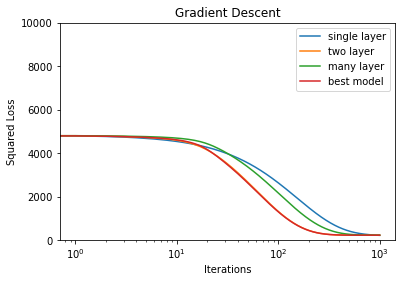

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from tqdm import tqdm

def load_data(file_path: str, label: str)->Tuple[np.ndarray, np.ndarray]:
    '''
    This function loads and parses text file separated by a ',' character and
    returns a data set as two arrays, an array of features, and an array of labels.
    Parameters
    
    '''
    D = np.genfromtxt(file_path, delimiter=",")
    if label == "train":
        features = D[0:800, :-3]  # all columns but the last three
        labels = D[0:800,-3:]  # the last 3 columns 
    else:
        features = D[801:1000, :-3]  # all columns but the last three
        labels = D[801:1000, -3:]  # the last 3 columns
    
    return features, labels

def initialize_network(layer_sizes : list, scale : float):
    """
    This function will inialize weights for an arbitrary neural network defined by
    the number of neurons in each layer, given by 'layer_sizes'
    Your weights should be initialized to be numpy arrays composed of random numbers
    taken from a gaussian distribution with mean=0 and std=1, then multiplied by scale
    Parameters
    ----------
    layer_sizes : np.ndarray
        An array of intergers that denote the number of neurons in each layer
        [100, 50, 20] would denote a network with 100 inputs, a hidden layer
        with 50 neurons and output of size 20 -- this would mean W_0 would have dimensions (100,50) 
        The scale of our initial weights, our weights should mostly be in the range
        [-1,1] * scale
    
    Returns
        
    """

    init_params = {}
    for i in range(len(layer_sizes) - 1):
        w_key = "W" + str(i)
        b_key = "b" + str(i)
        row = layer_sizes[i]
        column = layer_sizes[i+1]
        w_matrix = np.random.randn(row, column) * scale
        b_matrix = np.random.randn(column) * scale
        init_params[w_key] = w_matrix
        init_params[b_key] = b_matrix
    # print("testttttttttttttttttt")
    # print("layer size is: ", layer_sizes)
    # for key, val in init_params.items():
    #     print(key, val.shape)

    return init_params

def sigma_forward(IN: np.ndarray):
    """
    performs the nonlinear function (sigmoid) on the given input and returns the result
     1/(1 + e^IN)
    
    """
    
     
    A =1/ (1+np.exp(-1*IN))
    
    ######################################

    return A

def forward(params: dict, X: np.ndarray):
    """
    This function will perform the forward pass of your backprop algorithm
    It will calculate networks prediction using parameters and
    will keep a cache of all intermittent values (which will need for backprop)
   
        IN0: X
        A0: X
        IN1: X.W0 + b0
        A1: sigma(IN1)
        IN2: A1.W1 + b1
        A2: sigma(IN2), but in our case there is only two layers,
              so we do need to pass IN2 to sigma to get A2, IN2
              is the prediction
    """ 
    cache = {}
    cache["A0"] = np.copy(X) 
    cache["IN0"] = np.copy(X)
   
    prediction = np.copy(X)
    n = int(len(params) / 2)# the number of layers of neuron
    if n >= 1:
        for i in range(1, n+1):       
            prediction = prediction.dot(params["W"+str(i-1)]) + params["b"+str(i-1)]
            cache["IN"+str(i)] = prediction       
            if i != n: # check for the last layer
                prediction = sigma_forward(prediction)
            cache["A"+str(i)] = prediction
            
    return prediction, cache

def sigma_backward(A: np.ndarray):
    """
    calculates the derivative of sigma function give the output of it
    Parameters
    
    """

    ######################################

    dsigma = (1-A) * A

    ######################################

    return dsigma


def backprop_and_loss(params: dict, prediction: np.ndarray, cache: dict, Y : np.ndarray):
    """
    This function will calculate the loss (LSE) of the predictions and the gradient
    of network for a single iteration.

    """

    gradient = {}

    
    n = int(len(params) / 2) # the number of layers
    resid = Y - prediction 
    dout = (resid* -2)
    for i in range(n): 
        rev_index = (n-i) - 1
        dw = (cache["A"+str(rev_index)].T).dot(dout)
        db = np.mean(dout)
        dx = dout.dot(params["W"+str(rev_index)].T)
        gradient["W"+str(rev_index)] = dw
        gradient["b"+str(rev_index)] = db
        dout = sigma_backward(cache["A" +str(rev_index)])*(dx)
    loss = resid **2
    
    return gradient, np.mean(loss)

def gradient_descent(X : np.ndarray, Y : np.ndarray, initial_params : dict, lr : float, num_iterations : int)->Tuple[List[float], np.ndarray]:
    """
    This function runs gradient descent for a fixed number of iterations on the
    mean squared loss for a linear model parameterized by the weight vector w.
    This function returns a list of the losses for each iteration of gradient
    descent along with the final weight vector.
    Parameters
   
    """
    # an iteration of SGD does the following: w = w - lr * dL/dw ; b = b - lr * dL/db

    losses = []
    final_params = {}
    params = initial_params

    for n in tqdm(range(num_iterations)):  #tqdm will create a loading bar for loop
        
        
        prediction, cache = forward(params, X)
        gradient, loss = backprop_and_loss(params, prediction, cache, Y)
        losses.append(loss)
        for i in range(int(len(params) / 2)):
            final_params["W" + str(i)] = params["W" + str(i)] - lr * gradient["W" + str(i)]
            final_params["b" + str(i)] = params["b" + str(i)] - lr * gradient["b" + str(i)]
        params = final_params

    return losses, final_params

def learning_curve(losses: list, names : list):
    """
    This function plots the learning curves for all gradient descent procedures in this homework.
    The plot is saved in the file learning_curve.png.
   
    """

    for loss in losses:
        plt.plot(loss)
    plt.xscale("log")
    plt.ylim(0, 10000)
    plt.xlabel("Iterations")
    plt.ylabel("Squared Loss")
    plt.title("Gradient Descent")
    plt.legend(names)
    plt.savefig("learning_curve.png")
    plt.show()

def train_best_model(Train_X, Train_Y):
    """
    This function will train the model with the hyper parameters
    and layers that you have found to be best -- this model must get below 3
    MSE loss on our test data (which is not the test data you are given)
    """

    BEST_SCALE = 0.1             
    BEST_LAYERS = [17, 15, 10, 7, 5, 3]                         
    BEST_ALPHA = 0.000001             
    BEST_NUM_ITERATIONS = 1000    

    best_params = initialize_network(BEST_LAYERS, BEST_SCALE)
    best_losses, best_final_params = gradient_descent(Train_X, Train_Y, best_params, lr=BEST_ALPHA, num_iterations=BEST_NUM_ITERATIONS)

    return best_losses, best_final_params  

def hw1_data():
    D = np.genfromtxt('housing.csv', delimiter=",")
    features = D[:, :-1]  # all columns but the last one
    labels = D[:, -1]  # the last column
    
    lr = 0.001 
    scale = 0.1 
    n_iter = 100 
    layers = [13,1] 

    model = initialize_network(layers, scale=scale)
    losses, final_params = gradient_descent(features, labels, model, lr=lr, num_iterations=n_iter)
    
    learning_curve([losses], ['MLP on housing data'])  



def main():
    Train_X, Train_Y = load_data("StudentsPerformance.csv", "train")  # load the data set

    N = 1000 

    init_params0 = initialize_network([17,3], scale=0.1) # initializes a sigle layer network (perceptron)
    losses0, final_params0 = gradient_descent(Train_X, Train_Y, init_params0, lr=1e-6, num_iterations=N)  

    init_params1 = initialize_network([17, 5, 3], scale=0.1)  # initializes a two layer network
    losses1, final_params1 = gradient_descent(Train_X, Train_Y, init_params1, lr=1e-6, num_iterations=N)  
   
    init_params2 = initialize_network([17, 7, 3, 3], scale=0.1)  # initializes a many layer network
    losses2, final_params2 = gradient_descent(Train_X, Train_Y, init_params2, lr=1e-6, num_iterations=N)   

    all_losses = [losses0, losses1, losses2]
    names = ["single layer", "two layer", "many layer", "best model"]
    print("final training loss values")
    for name, losses in zip(names, all_losses):
        print("{0:.<21}{1:>8.1f}".format(name, float(losses[-1])))


    Test_X, Test_Y = load_data("StudentsPerformance.csv", "test")

    pred0, _ = forward(final_params0, Test_X)
    test_loss0 = np.mean(np.square(Test_Y[:, None]  - pred0)) 
    print("test loss of model 1:", test_loss0)

    pred1, _ = forward(final_params1, Test_X)
    test_loss1 = np.mean(np.square(Test_Y[:, None]  - pred1)) 
    print("test loss of model 2:", test_loss1)

    pred2, _ = forward(final_params2, Test_X)
    test_loss2 = np.mean(np.square(Test_Y[:, None]  - pred2)) 
    print("test loss of model 3:", test_loss2)


    best_losses, best_params = train_best_model(Train_X, Train_Y) 
    best_pred, _ = forward(best_params, Test_X)
    best_loss = np.mean(np.square(Test_Y[:, None] - best_pred)) 
    print("test loss of your \"best\" model:", best_loss)
    all_losses.append(best_losses)
    learning_curve(all_losses, names)







if __name__ == "__main__":
    main()